In [1]:
"""
@ Author:         21140701-王勃栋（小组成员：姜楠(21140678)、王勃栋(21140701)、李甜(21140684)）
@ Create Date:    2021-11-30
@ Requirements:
1, Implmenting the logistic regression classifier without using sk-learn.
2, At least binary classifier implemented, multinomial LR highly suggested.
3, BGD,SGD or Mini-batch GD are all acceptable, more than one implementation will own etra credit.
4, L1/L2 regularization are also highly suggested for the implementation.
5, classifier evaluation required, such as cross-validation, roc&auc, confusion matrix.
6, Compare your implementation with Sk-learn regressor.

"""
import numpy as np
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#数据集准备,使用iris
iris = datasets.load_iris()

for i in range(len(iris.target)):
    if iris.target[i] != 0:
        iris.target[i] = 1
train_data, test_data, train_label, test_label = train_test_split(iris.data, iris.target, test_size=0.2,)

In [3]:
#sgd 实现
def sigmoid(X):
    return 1.0/(1+np.exp(-X))

def sgd(X, Y, w, b, batch_size, learningrate):
    gradient_w = (1/batch_size)*(np.dot(X.T, (sigmoid(np.dot(X, w.T))-Y)))
    gradient_b = (1/batch_size)*(np.sum(sigmoid(np.dot(X, w.T))-Y))
    w -= learningrate * gradient_w
    b -= learningrate * gradient_b

def batch(features, labels, batch_size):
    nums = len(features)
    index = [i for i in range(nums)]
    random.shuffle(index)
    for i in range(0, nums, batch_size):
        batch_index = index[i : min(i + batch_size, nums)]
        yield features[batch_index], labels[batch_index]
        


In [24]:
w_init = np.random.normal(0, 1, iris.data.shape[1])
b_init = np.zeros(1)
def crossEnrtropy(y, y_hat):
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def gradientDescent(X,Y,w,b,num,epoch):
    
    train_loss = []
    learning_rate = 0.1
    #梯度下降
    for i in range(epoch):
        for x, y in batch(X, Y, num):
            sgd(x, y, w, b, num, learning_rate)
        train_loss.append(crossEnrtropy(y, sigmoid(np.dot(x, w.T) + b)).mean())
    
    return train_loss,w,b

num=250
epoch=300
train_loss,w,b = gradientDescent(train_data,train_label,w_init,b_init,num,epoch)

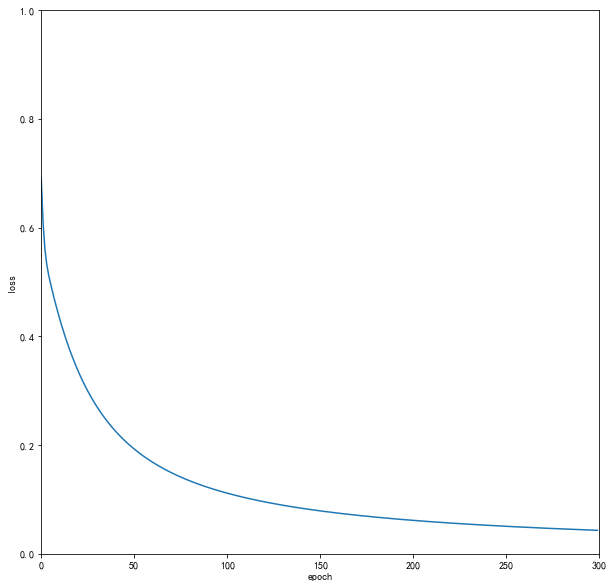

In [25]:
#展示损失曲线

plt.figure(figsize=(10,10))
plt.xlim((0, epoch))
plt.ylim((-0, 1))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(train_loss)
plt.show()

In [7]:
def predict(x):
    y = sigmoid(np.dot(x, w.T)+b)
    return (y > 0.5).astype(int)  

展现结果 [[11.  0.]
 [ 0. 19.]]


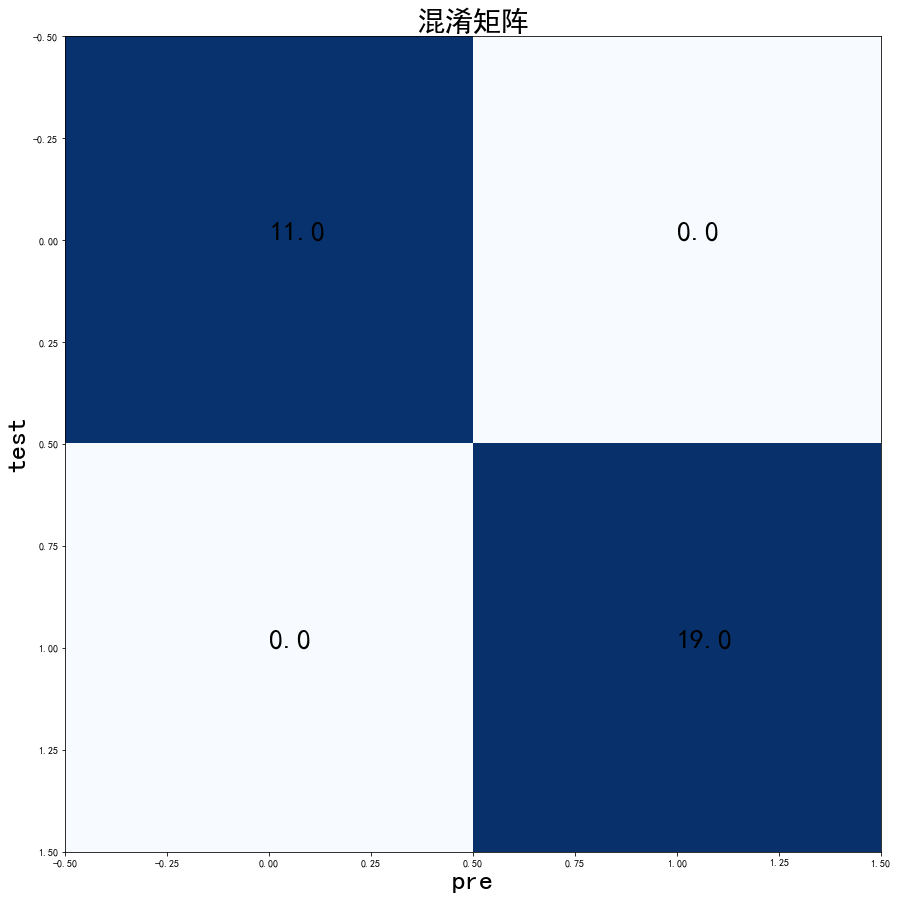

In [9]:
matrix = np.zeros((2,2))
    
predic = predict(test_data)
for p, t in zip(predic, test_label):
    matrix[p, t] += 1
    
print("展现结果",matrix)

plt.figure(figsize=(15,15))
confusion = np.array(([91,0],[0,92]))
# 热度图，后面是指定的颜色块，可设置其他的不同颜色
plt.imshow(confusion, cmap=plt.cm.Blues)

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('pre', fontsize = 28)
plt.ylabel('test', fontsize = 28)
plt.title('混淆矩阵',fontsize = 28)
for x, z in enumerate(matrix):
    for y, p in enumerate(z):
        plt.text(x ,y, p, fontsize=28)
plt.show()